# Series de tiempo

Las series de tiempo son datos estructurados como una variable numérica que evoluciona en el tiempo, a intervalos regulares. El PBI, la inflación, las exportaciones, la temperatura, la cantidad de llamadas a un call center... son todas variables que se pueden tratar como series de tiempo.

En https://datos.gob.ar/series podés buscar series de tiempo publicadas por distintos organismos de la Administración Pública Nacional y usar el link al CSV para leerlos directamente desde python con `pandas`.

Por ejemplo: si vas a https://datos.gob.ar/series/api/series/?ids=105.1_I2P_2016_M_13,105.1_I2CPC_2016_M_27 podés copiar la URL a un archivo CSV que tiene la evolución del precio de la papa y de la picada común (https://apis.datos.gob.ar/series/api/series/?ids=105.1_I2P_2016_M_13,105.1_I2CPC_2016_M_27&limit=1000&format=csv).

## Librerías

`pandas` es la principal librería de análisis de datos en python. Permite leer todo tipo de formatos tabulares en un `DataFrame` (objeto principal de la librería) desde el cual luego se pueden realizar todo tipo de transformaciones, procesamientos y graficar fácilmente.

In [1]:
import pandas as pd

`matplotlib` es una librería de gráficos de python de uso muy difundido, que se usa en `pandas`.

In [2]:
# permite que los gráficos se vean directamente en el notebook
%matplotlib inline 

# aplica una hoja de estilos para los gráficos
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

## DataFrame

In [3]:
# tomamos los datos del Estimador Mensual de la Actividad Económica
emae = pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=143.3_NO_PR_2004_A_31,143.3_NO_PR_2004_A_28,143.3_NO_PR_2004_A_21&limit=1000&format=csv")

In [4]:
# para ver las primeras filas
emae.head()

,indice_tiempo,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo,indice_serie_original
0,2004-01-01,98.455396,96.648473,92.627506
1,2004-02-01,98.438253,97.053738,90.186179
2,2004-03-01,97.191919,97.560773,101.883298
3,2004-04-01,95.752758,98.124218,102.567430
4,2004-05-01,96.640359,98.738446,109.877504


In [5]:
# para ver las últimas filas
emae.tail(10)

,indice_tiempo,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo,indice_serie_original
170,2018-03-01,152.394748,149.157257,155.671181
171,2018-04-01,148.324834,148.191691,152.969581
172,2018-05-01,145.612767,147.127582,161.957831
173,2018-06-01,143.190301,146.011250,151.677536
174,2018-07-01,144.670041,144.898104,147.078902
175,2018-08-01,145.929079,143.852572,146.052802
176,2018-09-01,142.984388,142.929827,137.073458
177,2018-10-01,143.623108,142.164382,142.147308
178,2018-11-01,140.696011,141.579643,139.924516
179,2018-12-01,141.654234,141.179887,136.752403


In [6]:
# para ver los tipos que pandas infirió al leer los datos
emae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
indice_tiempo                      180 non-null object
indice_serie_desestacionalizada    180 non-null float64
indice_serie_tendencia_ciclo       180 non-null float64
indice_serie_original              180 non-null float64
dtypes: float64(3), object(1)
memory usage: 5.7+ KB


Por default, `pandas` asigna un índice numérico al leer una tabla nueva (si no se especifica una columna que deba ser tomada como índice). En este caso, queremos que se identifique a `indice_tiempo` como el índice de la tabla y además que se identifique como "fecha" y no como texto.

In [7]:
emae["indice_tiempo"] = pd.to_datetime(emae["indice_tiempo"])

In [8]:
# ahora es de tipo fecha
emae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
indice_tiempo                      180 non-null datetime64[ns]
indice_serie_desestacionalizada    180 non-null float64
indice_serie_tendencia_ciclo       180 non-null float64
indice_serie_original              180 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 5.7 KB


In [9]:
# ahora la fecha es el índice de la tabla
emae = emae.set_index("indice_tiempo")
emae.head()

,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo,indice_serie_original
indice_tiempo,,,
2004-01-01,98.455396,96.648473,92.627506
2004-02-01,98.438253,97.053738,90.186179
2004-03-01,97.191919,97.560773,101.883298
2004-04-01,95.752758,98.124218,102.567430
2004-05-01,96.640359,98.738446,109.877504


Setear un índice, permite localizar valores puntuales más fácilmente. Los valores del índice y los nombres de las columnas actúan de "coordenadas" de la tabla.

In [10]:
emae.loc["2018-04-01", "indice_serie_original"]

152.96958051625094

O incluso aplicar filtros temporales.

In [11]:
emae[emae.index > "2018-01-01"]

,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo,indice_serie_original
indice_tiempo,,,
2018-02-01,152.451287,149.982237,138.916748
2018-03-01,152.394748,149.157257,155.671181
2018-04-01,148.324834,148.191691,152.969581
2018-05-01,145.612767,147.127582,161.957831
2018-06-01,143.190301,146.011250,151.677536
2018-07-01,144.670041,144.898104,147.078902
2018-08-01,145.929079,143.852572,146.052802
2018-09-01,142.984388,142.929827,137.073458
2018-10-01,143.623108,142.164382,142.147308


In [12]:
# estadísticas sumarias sobre las variables que tiene la tabla
emae.describe()

,indice_serie_desestacionalizada,indice_serie_tendencia_ciclo,indice_serie_original
count,180.000000,180.000000,180.000000
mean,135.184418,134.789674,135.184418
std,15.598204,15.453527,17.438070
min,95.752758,96.648473,90.186179
25%,125.522201,125.067455,126.006093
50%,143.087344,143.516386,138.544139
75%,147.158988,146.705799,147.015552
max,153.279438,151.316784,170.406160


Un `DataFrame` se puede guardar en una gran variedad de formatos.

In [13]:
emae.to_csv("emae.csv", encoding="utf8")
emae.to_excel("emae.xlsx", encoding="utf8")
emae.to_html("emae.html")
emae.to_stata("emae.dta")

**Ejercicio:** buscar la serie del tipo de cambio del Banco Nación (BNA vendedor), generar un índice de tiempo, guardar los datos en CSV e imprimir el valor del 1 de Enero de 2019 en el notebook.

## Gráficos simples con pandas

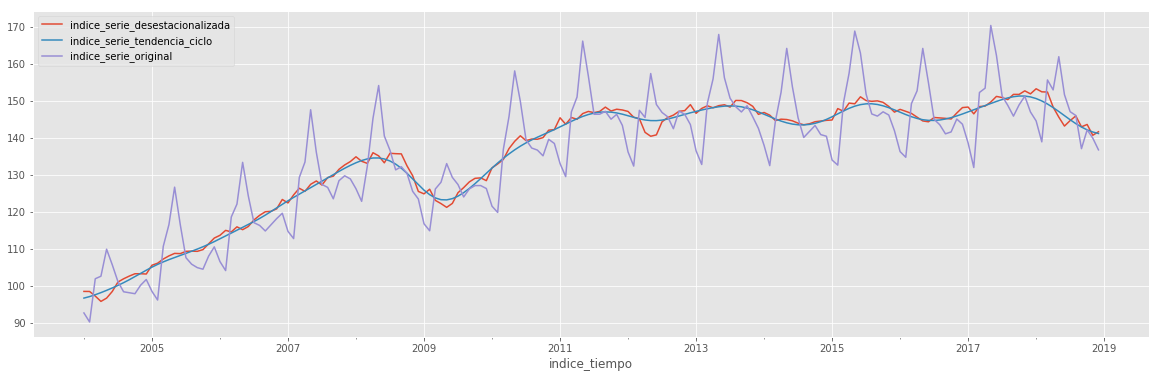

In [14]:
emae.plot(figsize=(20,6))

Por default, pandas grafica todas las columnas numéricas como "líneas" pero existen otros tipos de gráficos que se pueden usar.

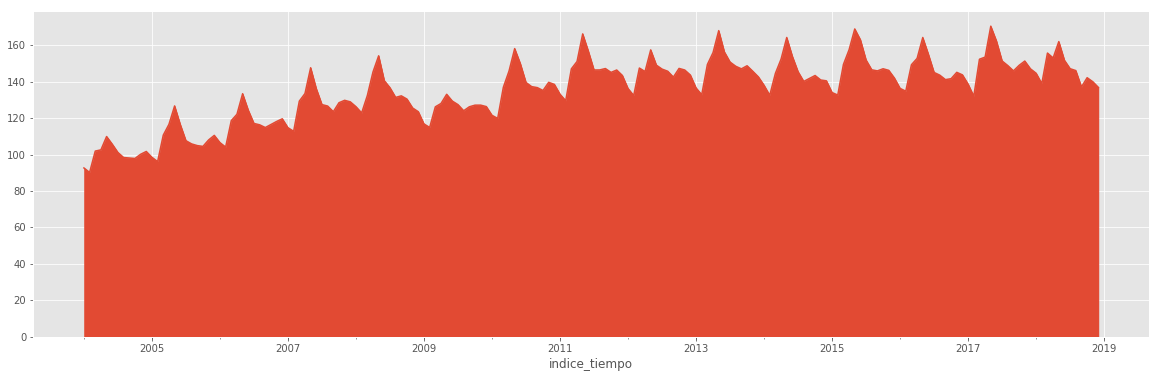

In [15]:
emae.indice_serie_original.plot(figsize=(20,6), kind="area")

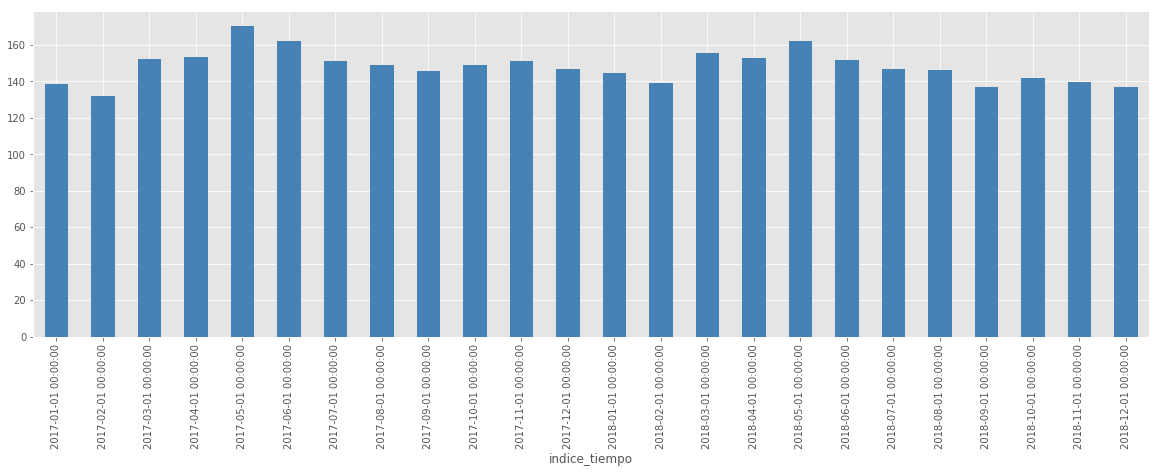

In [16]:
emae[emae.index > "20161201"].indice_serie_original.plot(figsize=(20,6), kind="bar", color="steelblue")

En el gráfico de barras el índice de tiempo se muestra como una fecha completa. Para que se muestre sólo lo necesario para la frecuencia temporal que tiene, se puede convertir el índice a "períodos" en lugar de fechas completas.

In [17]:
emae.index = emae.index.to_period()

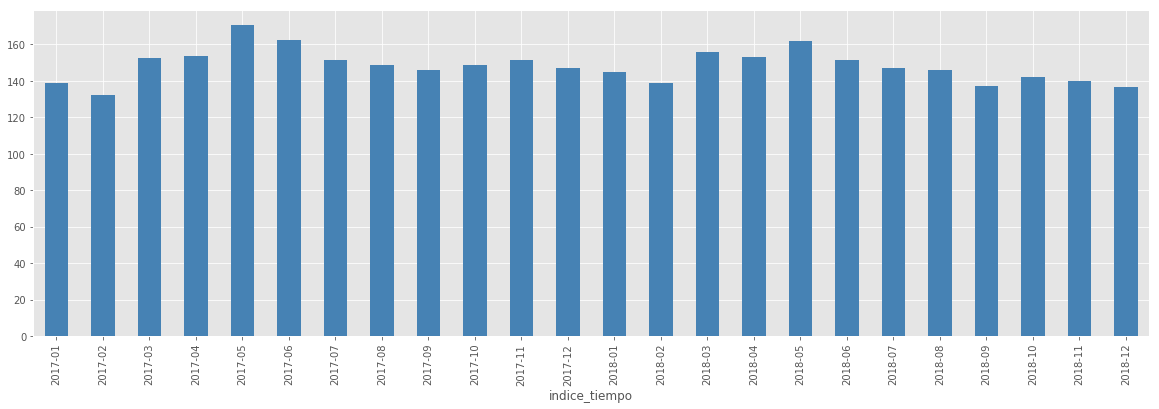

In [18]:
emae[emae.index > "20161201"].indice_serie_original.plot(figsize=(20,6), kind="bar", color="steelblue")

**Ejercicio:** graficar las variaciones del emae (serie original) como cambio porcentual respecto de 12 meses atrás (variación porcentual interanual) en un gráfico de barras con el mismo color desde 2016 en adelante. CAMBIAR EL EJERCICIO O EXPLICAR ANTES EL PCT_CHANGE

## Correlación y gráficos múltiples

Ahora vas a ver cómo buscar variables que expliquen o correlacionen con una variable de interés a partir de la exploración visual y luego del análisis de correlación. En este caso vamos a descargar distintas componentes sectoriales del nivel de actividad para entender cuáles explican o correlacionan mejor con el nivel de actividad general.

In [20]:
# descargamos el emae general, construcción, industria, comercio, pesca, agricultura y hotelería
nivel_actividad = pd.read_csv("https://apis.datos.gob.ar/series/api/series/?ids=11.3_VMATC_2004_M_12,143.3_NO_PR_2004_A_21,11.3_VMASD_2004_M_23,11.3_VIPAA_2004_M_5,11.3_ISOM_2004_M_39,11.3_P_2004_M_20,11.3_AGCS_2004_M_41&limit=1000&format=csv")

# generamos el índice de tiempo
nivel_actividad["indice_tiempo"] = pd.to_datetime(nivel_actividad["indice_tiempo"])
nivel_actividad = nivel_actividad.set_index("indice_tiempo")

El tipo de los gráficos en pandas se puede especificar tanto pasando la variable `kind` como hiciste antes, como accediendo a la función `plot` como un objeto con "subfunciones".

In [22]:
nivel_actividad.head()

,construccion,indice_serie_original,industria_manufacturera,pesca,agricultura_ganaderia_caza_silvicultura,hoteles_restaurantes,comercio_mayorista_minorista_reparaciones
indice_tiempo,,,,,,,
2004-01-01,95.938047,92.627506,91.454610,42.547868,65.995350,108.411682,92.065338
2004-02-01,98.853388,90.186179,89.424852,62.440771,64.926598,103.448256,91.464718
2004-03-01,103.124529,101.883298,101.426433,174.084646,110.666559,101.061842,109.127780
2004-04-01,95.815492,102.567430,98.437312,153.877638,150.065920,93.242999,99.420141
2004-05-01,97.994567,109.877504,100.353138,132.357664,209.388076,90.985260,100.532744


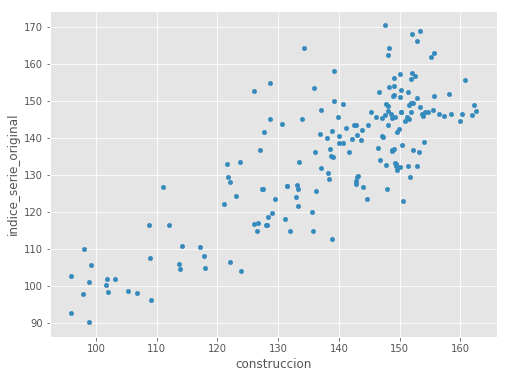

In [21]:
nivel_actividad.plot.scatter("construccion", "indice_serie_original", figsize=(8,6))

`matplotlib` permite generar un gráfico compuesto de "subgráficos" con la función `plt.subplots()`

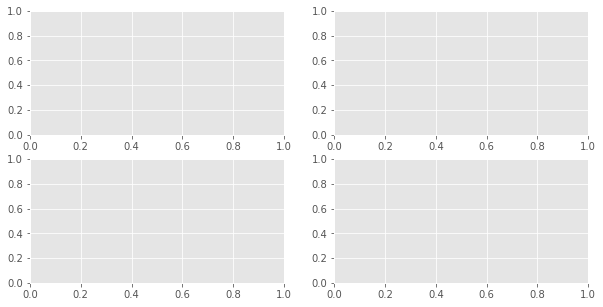

In [23]:
# genera un lienzo con 4 subgráficos vacíos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

Dentro de la misma celda donde se crea el lienzo de subgráficos, deben crearse y asignarse a los "axes" c/u de los subgráficos.

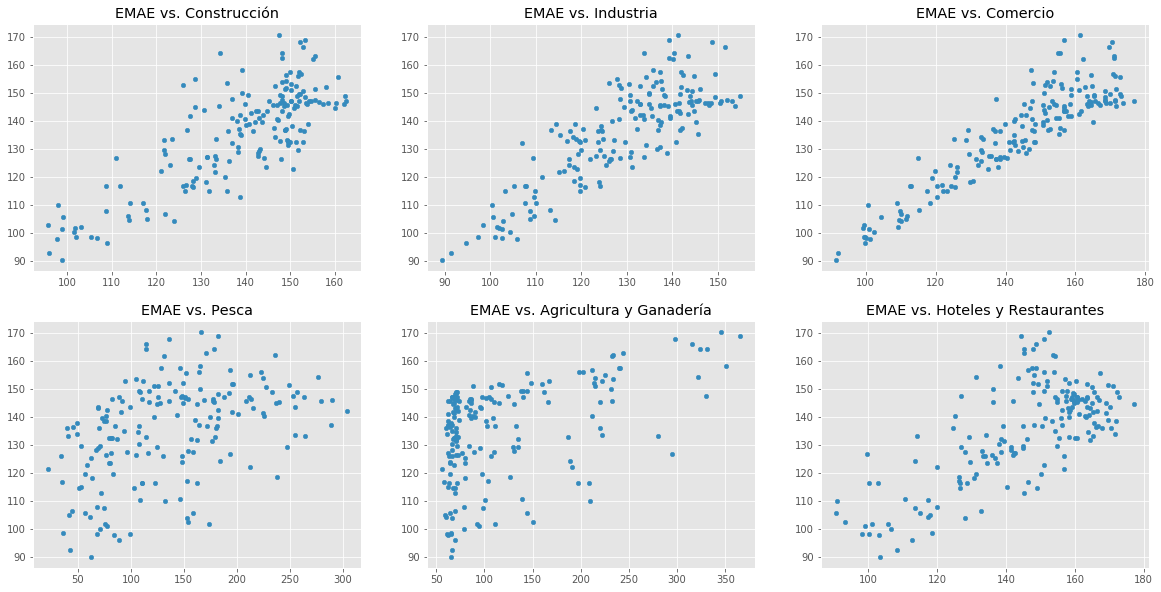

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

nivel_actividad.plot.scatter("construccion", "indice_serie_original", ax=axes[0,0], title="EMAE vs. Construcción")
nivel_actividad.plot.scatter("industria_manufacturera", "indice_serie_original", ax=axes[0,1], title="EMAE vs. Industria")
nivel_actividad.plot.scatter("comercio_mayorista_minorista_reparaciones", "indice_serie_original", ax=axes[0,2], title="EMAE vs. Comercio")

nivel_actividad.plot.scatter("pesca", "indice_serie_original", ax=axes[1,0], title="EMAE vs. Pesca")
nivel_actividad.plot.scatter("agricultura_ganaderia_caza_silvicultura", "indice_serie_original", ax=axes[1,1], title="EMAE vs. Agricultura y Ganadería")
nivel_actividad.plot.scatter("hoteles_restaurantes", "indice_serie_original", ax=axes[1,2], title="EMAE vs. Hoteles y Restaurantes")

# elimina los labels de los ejes para que se vea mejor
for row in axes:
    for ax in row:
        pass
        ax.set_xlabel("")
        ax.set_ylabel("")

La construcción, la industria, el comercio y los servicios de hotelería y restaurantes parecen correlacionar fuertemente con el nivel de actividad general, mientras que la pesca y el sector agropecuario casi no muestran relación alguna! Podés mirar la matriz de correlaciones de la tabla para corroborar esto.

In [27]:
# VER CÓMO HACER ESTA TABLA COMO UN HEATMAP
nivel_actividad.corr()

,construccion,indice_serie_original,industria_manufacturera,pesca,agricultura_ganaderia_caza_silvicultura,hoteles_restaurantes,comercio_mayorista_minorista_reparaciones
construccion,1.000000,0.806992,0.810517,0.302032,0.048874,0.823192,0.880459
indice_serie_original,0.806992,1.000000,0.840723,0.445256,0.475728,0.717857,0.914197
industria_manufacturera,0.810517,0.840723,1.000000,0.366732,0.170599,0.663064,0.936491
pesca,0.302032,0.445256,0.366732,1.000000,0.324868,0.137077,0.387705
agricultura_ganaderia_caza_silvicultura,0.048874,0.475728,0.170599,0.324868,1.000000,-0.181795,0.172752
hoteles_restaurantes,0.823192,0.717857,0.663064,0.137077,-0.181795,1.000000,0.792509
comercio_mayorista_minorista_reparaciones,0.880459,0.914197,0.936491,0.387705,0.172752,0.792509,1.000000


Si ves la pesca y el sector agropecuario en el mismo gráfico con la serie original, es evidente que estos dos sectores tienen una estacionalidad mucho más pronunciada que el nivel general de actividad, y por esto tienen una baja correlación.

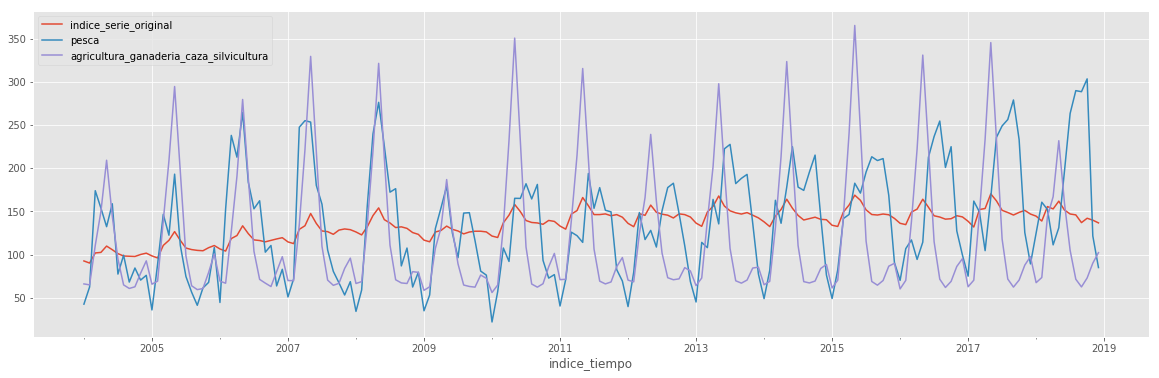

In [218]:
nivel_actividad[["indice_serie_original", "pesca", "agricultura_ganaderia_caza_silvicultura"]].plot(figsize=(20, 6))

Probablemente debas chequear si existe relación cuando se consideran las variaciones del índice, en lugar del valor absoluto. Pero el bloque de código era bastante engorroso para estar probando ágilmente esas transformaciones y cambiar rápidamente. Deberías poner ese bloque dentro de una función, cuyos argumentos de entrada sean aquellas cosas que quieras cambiar.

In [28]:
def generate_emae_scatters(nivel_actividad):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

    nivel_actividad.plot.scatter("construccion", "indice_serie_original", ax=axes[0,0], title="EMAE vs. Construcción")
    nivel_actividad.plot.scatter("industria_manufacturera", "indice_serie_original", ax=axes[0,1], title="EMAE vs. Industria")
    nivel_actividad.plot.scatter("comercio_mayorista_minorista_reparaciones", "indice_serie_original", ax=axes[0,2], title="EMAE vs. Comercio")

    nivel_actividad.plot.scatter("pesca", "indice_serie_original", ax=axes[1,0], title="EMAE vs. Pesca")
    nivel_actividad.plot.scatter("agricultura_ganaderia_caza_silvicultura", "indice_serie_original", ax=axes[1,1], title="EMAE vs. Agricultura y Ganadería")
    nivel_actividad.plot.scatter("hoteles_restaurantes", "indice_serie_original", ax=axes[1,2], title="EMAE vs. Hoteles y Restaurantes")

    # elimina los labels de los ejes para que se vea mejor
    for row in axes:
        for ax in row:
            ax.set_xlabel("")
            ax.set_ylabel("")
    
    return axes

Las variaciones mensuales del EMAE tienen una fuerte correlación con las variaciones mensuales del sector agropecuario!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b53e9b0>,
      dtype=object)

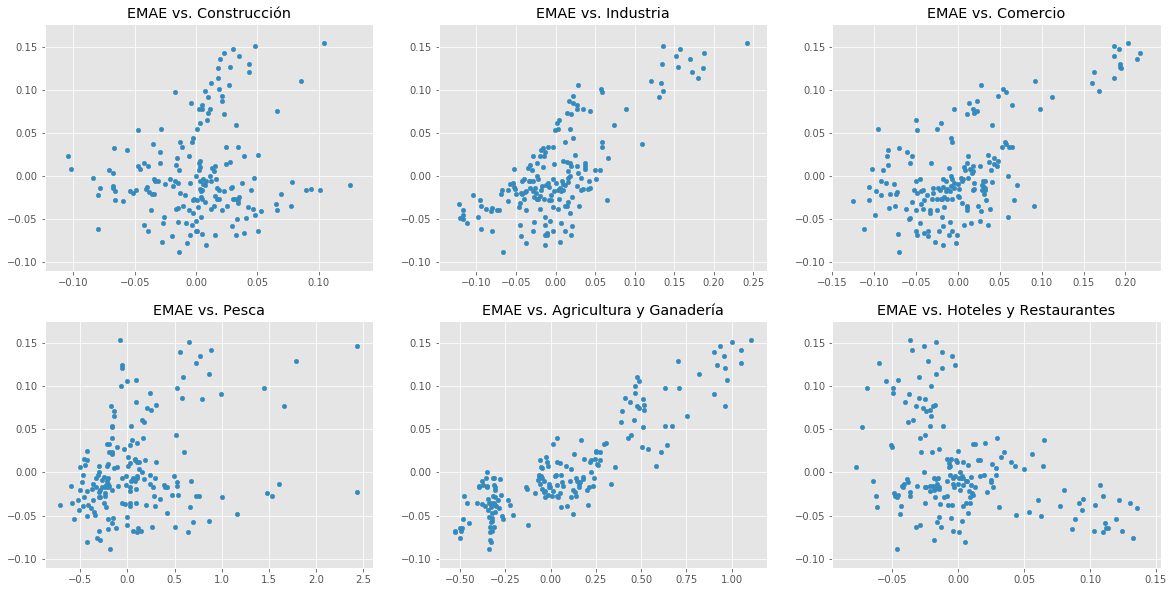

In [29]:
generate_emae_scatters(nivel_actividad.pct_change(1))

In [30]:
nivel_actividad.pct_change(1).corr()

,construccion,indice_serie_original,industria_manufacturera,pesca,agricultura_ganaderia_caza_silvicultura,hoteles_restaurantes,comercio_mayorista_minorista_reparaciones
construccion,1.000000,0.164362,0.225151,0.075078,-0.080838,0.177559,0.418891
indice_serie_original,0.164362,1.000000,0.753317,0.321910,0.889071,-0.409594,0.669895
industria_manufacturera,0.225151,0.753317,1.000000,0.341185,0.561652,-0.168338,0.836980
pesca,0.075078,0.321910,0.341185,1.000000,0.325939,-0.403512,0.388123
agricultura_ganaderia_caza_silvicultura,-0.080838,0.889071,0.561652,0.325939,1.000000,-0.526798,0.458315
hoteles_restaurantes,0.177559,-0.409594,-0.168338,-0.403512,-0.526798,1.000000,-0.126858
comercio_mayorista_minorista_reparaciones,0.418891,0.669895,0.836980,0.388123,0.458315,-0.126858,1.000000


Las variaciones en el sector agropecuario casi siempre empujan a las variaciones en el nivel general (que obviamente ocurren en menor magnitud) ya que es un sector con una alta incidencia en la producción total en Argentina. No es este el caso de la pesca.

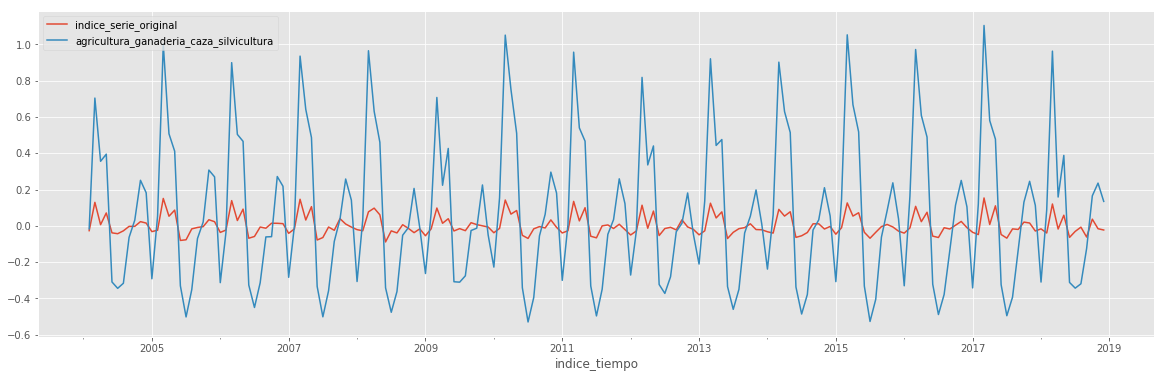

In [220]:
nivel_actividad.pct_change(1)[["indice_serie_original", "agricultura_ganaderia_caza_silvicultura"]].plot(figsize=(20, 6))

Si querés seguir la evolución de mediano plazo de la producción agropecuaria, una forma sencilla de remover el ruido estacional es aplicar un promedio móvil de 12 meses. Para esto podés usar la función `rolling` que te permite elegir una ventana de X períodos sobre la cual hacer un cálculo o una agregación.

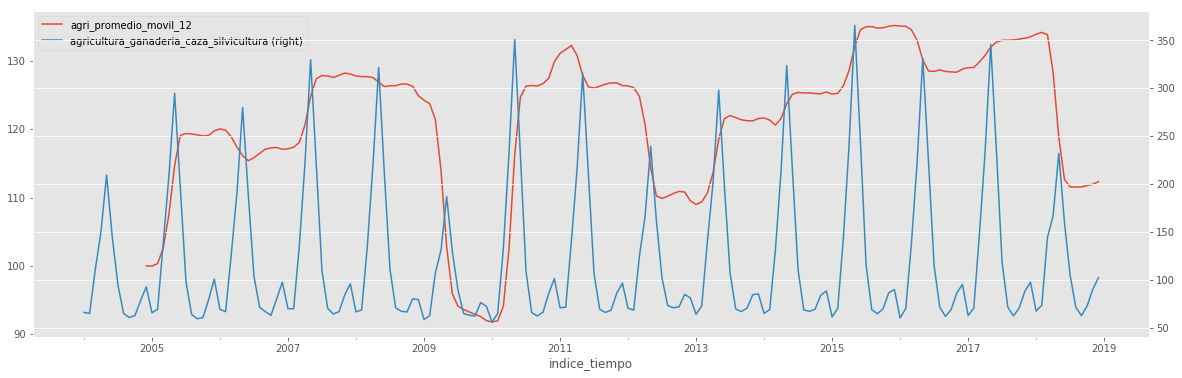

In [239]:
nivel_actividad["agri_promedio_movil_12"] = nivel_actividad.agricultura_ganaderia_caza_silvicultura.rolling(12).mean()
nivel_actividad[["agri_promedio_movil_12", "agricultura_ganaderia_caza_silvicultura"]].plot(
    figsize=(20,6), secondary_y="agricultura_ganaderia_caza_silvicultura")

**Ejercicio:** chequear la correlación entre las variaciones _interanuales_ (12 meses) del EMAE y sus componentes sectoriales.

## Ejercicios para la casa

**Ejercicio para hacer en casa:** crear un simple tablero de seguimiento de variables de coyuntura usando _subplots_ que contenga la evolución del tipo de cambio BNA vendedor (promedio móvil 30 días), la tasa de interés de política monetaria, la inflación interanual mensual (`pct_change(12)`, la expectativa de inflación de los próximos 12 meses, las variaciones porcentuales mensuales del nivel de actividad (EMAE) y el saldo comercial mensual (promedio móvil 3 meses).